# Analyzing 380K Kickstarter Campaigns
***

In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/ks-projects-201801.csv')

<br><br>

## Basic Statistics

In [3]:
data.shape

(378661, 15)

In [4]:
data.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [5]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [6]:
def make_bar_chart(dataset, attribute, bar_color='#05ce78', edge_color='#049456', title='Title', xlab='X', ylab='Y', sort_index=False):
    if sort_index == False:
        xs = dataset[attribute].value_counts().index
        ys = dataset[attribute].value_counts().values
    else:
        xs = dataset[attribute].value_counts().sort_index().index
        ys = dataset[attribute].value_counts().sort_index().values
    
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.bar(x=xs, height=ys, color=bar_color, edgecolor=edge_color, linewidth=2)
    plt.xticks(rotation=45)

<br><br>

## Number of Campaigns by Year

In [25]:
years_df = data[['launched', 'main_category']]
years_df['launched'] = years_df['launched'].apply(lambda x: x.split()[0].split('-')[0])

make_bar_chart(years_df, 'launched', title='Campaigns per Year', xlab='Year', ylab='Counts', sort_index=True)

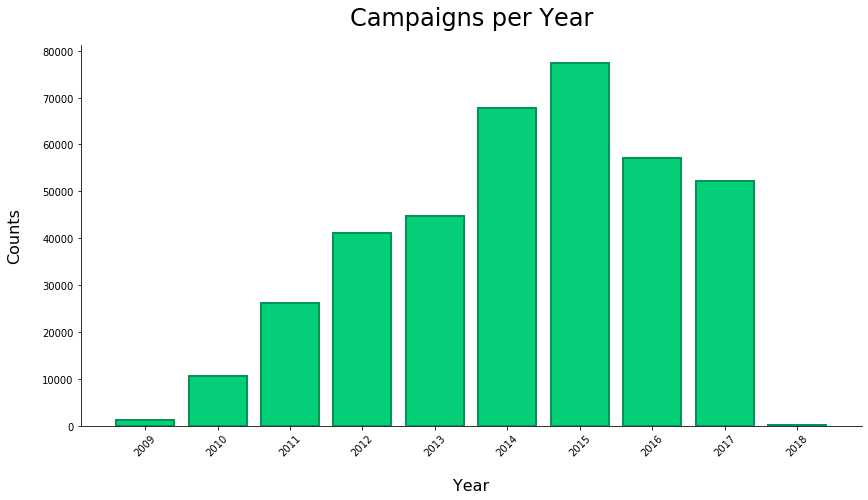

In [26]:
make_bar_chart(years_df, 'launched', title='Campaigns per Year', xlab='Year', ylab='Counts', sort_index=True)

<br><br>

## Number of Campaigns by Country

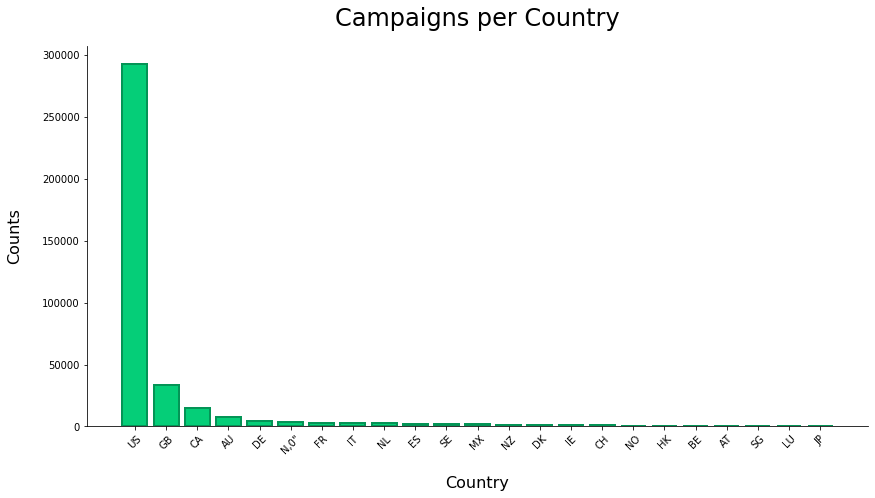

In [24]:
make_bar_chart(data, 'country', title='Campaigns per Country', xlab='Country', ylab='Counts')

<br><br>

## Exploring Campaign Categories

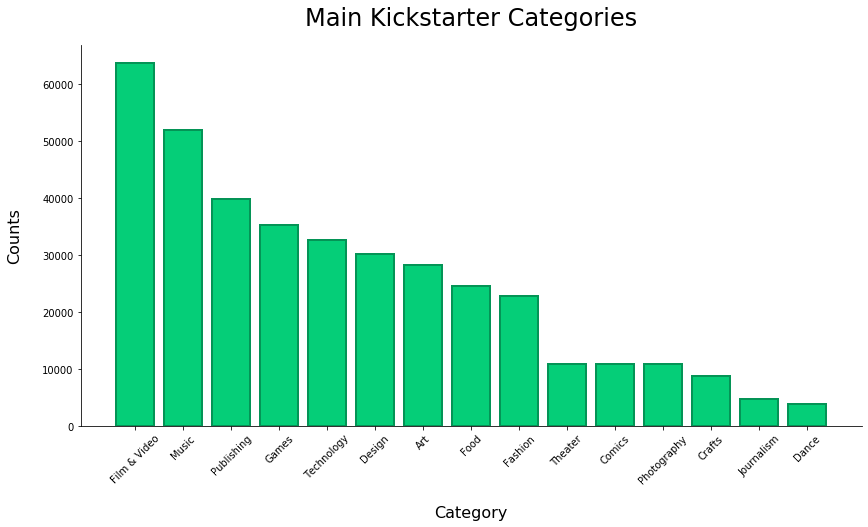

In [7]:
make_bar_chart(data, 'main_category', title='Main Kickstarter Categories', xlab='Category', ylab='Counts')

<br><br>

## Campaign Duration

In [8]:
durations = []

for i1, i2 in zip(data['deadline'], data['launched'].apply(lambda x: str(x).split()[0])):
    diff = datetime.datetime.strptime(i1, '%Y-%m-%d') - datetime.datetime.strptime(i2, '%Y-%m-%d')
    durations.append(diff.total_seconds() / 60 / 60 / 24)

data['campain_duration'] = durations

In [9]:
data['campain_duration'].describe()

count    378661.000000
mean         34.481095
std          65.909173
min           1.000000
25%          30.000000
50%          30.000000
75%          37.000000
max       16739.000000
Name: campain_duration, dtype: float64

In [10]:
data['campain_duration'].nlargest(10)

319002    16739.0
2842      14867.0
48147     14835.0
94579     14761.0
75397     14750.0
247913    14733.0
273779    14709.0
22618        92.0
38476        92.0
61014        92.0
Name: campain_duration, dtype: float64

In [11]:
data.iloc[319002][['launched', 'deadline']]

launched    1970-01-01 01:00:00
deadline             2015-10-31
Name: 319002, dtype: object

In [12]:
data = data[data['campain_duration'] < 100]

In [13]:
def make_histogram(dataset, attribute, bar_color='#05ce78', bins=25, edge_color='#049456', title='Title', xlab='X', ylab='Y'):
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color)
    
    
make_histogram(data, 'campain_duration', title='Histogram of Campain Durations in Days', xlab='Duration (Days)', ylab='Counts')

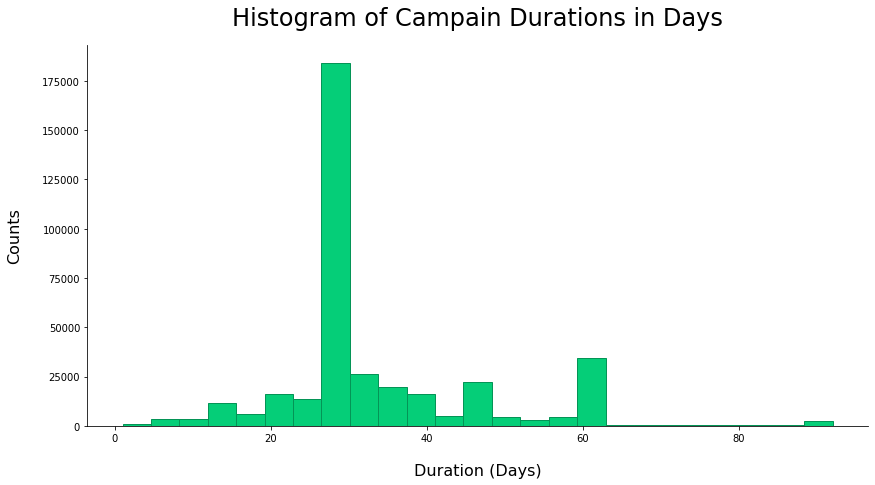

In [14]:
make_histogram(data, 'campain_duration', title='Histogram of Campain Durations in Days', xlab='Duration (Days)', ylab='Counts')

<br><br>

## Exploring Campaign Success by Category

In [15]:
data['state'].value_counts()

failed        197719
successful    133956
canceled       38773
undefined       3562
live            2799
suspended       1845
Name: state, dtype: int64

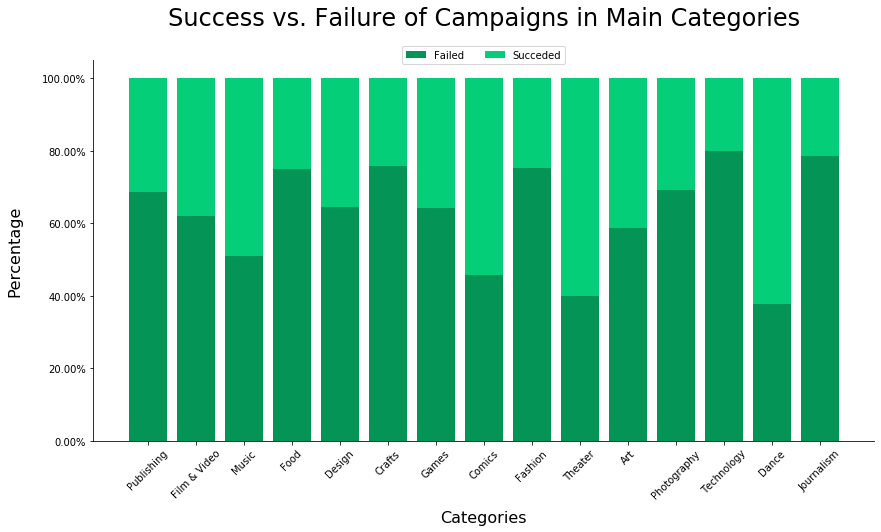

In [88]:
state_df = data[data['state'].isin(['failed', 'successful', 'canceled', 'suspended'])]
state_df['state'].replace({'failed': 'not_successful', 'canceled': 'not_successful', 'suspended': 'not_successful'}, inplace=True)
state_df['state'].replace({'successful': 1, 'not_successful': 0}, inplace=True)


dt = []
for value in state_df['main_category'].unique():
    dset = state_df[state_df['main_category'] == value]
    success = len(dset[dset['state'] == 1])
    failed = len(dset[dset['state'] == 0])
    
    dt.append({
        'Main_Category': value,
        'Count': failed,
        'Pct_Success': success / (success + failed),
        'Pct_Failed': failed / (success + failed)
    })
df = pd.DataFrame(dt)


xs = df['Main_Category']
ys_s = df['Pct_Success']
ys_f = df['Pct_Failed']

fig, ax = plt.subplots(figsize=(14, 7))
plt.xticks(rotation=45)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Success vs. Failure of Campaigns in Main Categories', fontsize=24, pad=35)
ax.set_xlabel('Categories', fontsize=16, labelpad=10)
ax.set_ylabel('Percentage', fontsize=16, labelpad=20)

plt.bar(x=xs, height=ys_f, color='#049456', label='Failed')
plt.bar(x=xs, height=ys_s, bottom=ys_f, color='#05ce78', label='Succeded')

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fancybox=True);

<br><br>

## Campaign Goal vs. Pledged Analysis

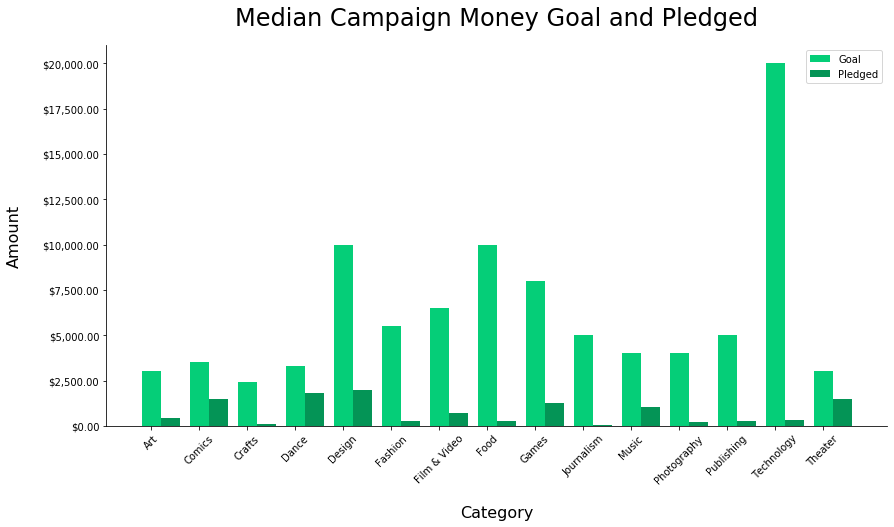

In [89]:
goal_df = data[['goal', 'pledged', 'main_category']]
goal_df_grouped = goal_df.groupby(by='main_category').median()

xs = np.array(goal_df_grouped.index)
ys_1 = goal_df_grouped['goal'].values
ys_2 = goal_df_grouped['pledged'].values

fig, ax = plt.subplots(figsize=(14, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Median Campaign Money Goal and Pledged', fontsize=24, pad=20)
ax.set_xlabel('Category', fontsize=16, labelpad=20)
ax.set_ylabel('Amount', fontsize=16, labelpad=20)

plt.bar(x=[num for num in range(len(xs))], height=ys_1, color='#05ce78', width=0.4, label='Goal', align='center')
plt.bar(x=[num + 0.4 for num in range(len(xs))], height=ys_2, color='#049456', width=0.4, label='Pledged', align='center')

ax.set_xticks(np.arange(len(xs)))
ax.set_xticklabels(xs)

y_fmt = '${x:,.2f}'
y_tick = mtick.StrMethodFormatter(y_fmt)
ax.yaxis.set_major_formatter(y_tick) 

plt.legend()
plt.xticks(rotation=45);

<br><br>

## Title Exploration

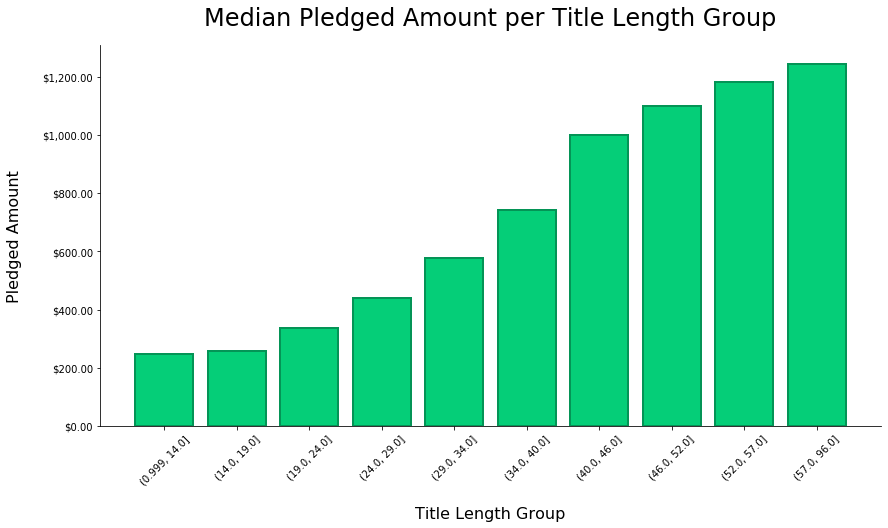

In [90]:
data['name_length'] = data['name'].apply(lambda x: len(str(x)))
data['name_length_group'] = pd.qcut(data['name_length'], 10)
pledged_per_length_agg = data[['pledged', 'name_length_group']].groupby('name_length_group').median()

indexes = []
for val in pledged_per_length_agg.index.tolist():
    indexes.append(str(val))
    
xs = indexes
ys = np.ravel(pledged_per_length_agg.values)

fig, ax = plt.subplots(figsize=(14, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Median Pledged Amount per Title Length Group', fontsize=24, pad=20)
ax.set_xlabel('Title Length Group', fontsize=16, labelpad=20)
ax.set_ylabel('Pledged Amount', fontsize=16, labelpad=20)

y_fmt = '${x:,.2f}'
y_tick = mtick.StrMethodFormatter(y_fmt)
ax.yaxis.set_major_formatter(y_tick) 

plt.bar(x=xs, height=ys, color='#05ce78', edgecolor='#049456', linewidth=2)
plt.xticks(rotation=45);